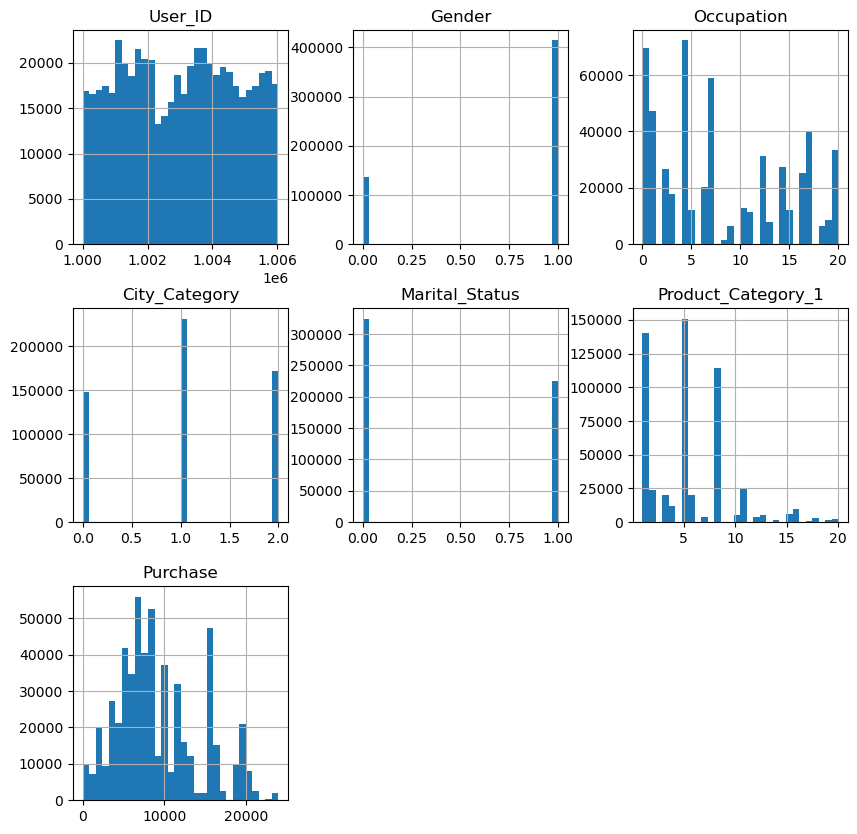

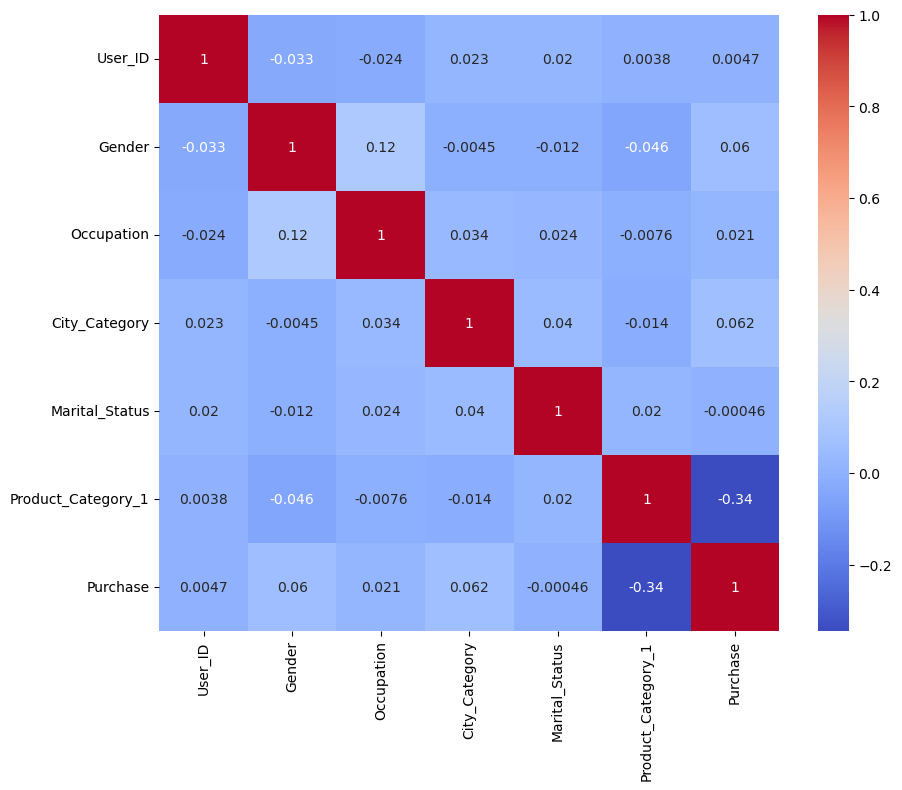

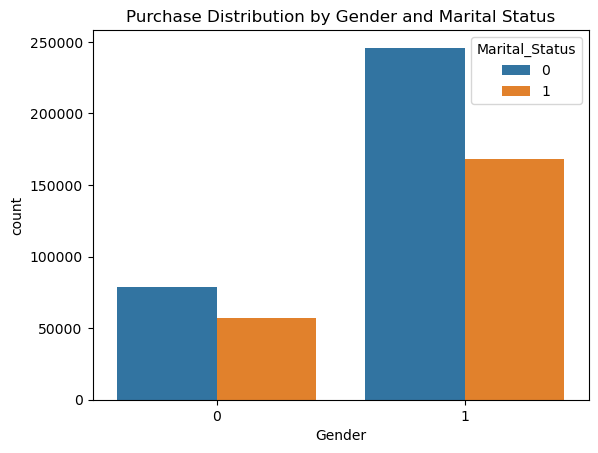

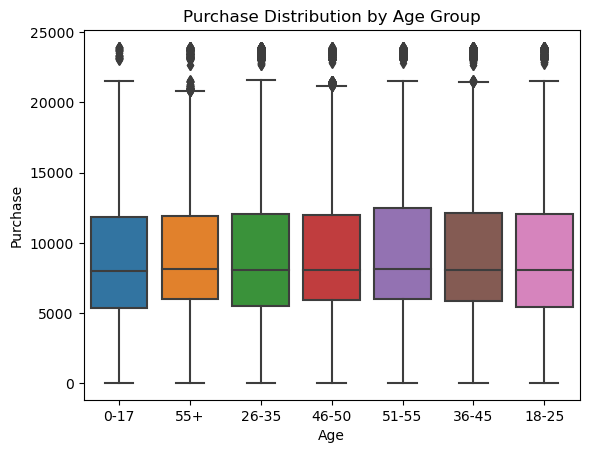

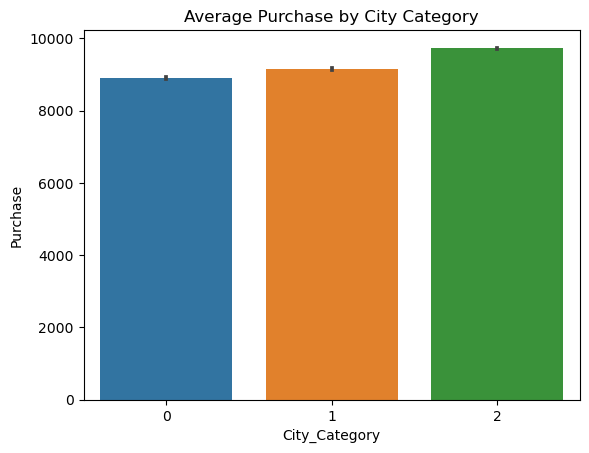

ValueError: could not convert string to float: '51-55'

In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\CVR\Downloads\COE\black-friday.csv")
df.head()

df.isnull().sum()

for column in df.columns:
    if df[column].dtype != 'object':  # Only apply to numerical columns
        df[column].fillna(df[column].median(), inplace=True)

df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['City_Category'] = df['City_Category'].map({'A': 0, 'B': 1, 'C': 2})
df['Marital_Status'] = df['Marital_Status'].map({0: 0, 1: 1})
df.drop(columns=['Product_Category_2', 'Product_Category_3'], inplace=True)
df.head()

df.describe()
df_numeric = df.select_dtypes(include=[float, int])  # Only numeric columns
df_numeric.corr()  # Compute the correlation on numeric columns

import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10), bins=30)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.countplot(data=df, x='Gender', hue='Marital_Status')
plt.title('Purchase Distribution by Gender and Marital Status')
plt.show()

sns.boxplot(data=df, x='Age', y='Purchase')
plt.title('Purchase Distribution by Age Group')
plt.show()

sns.barplot(data=df, x='City_Category', y='Purchase')
plt.title('Average Purchase by City Category')
plt.show()

X = df.drop(columns=['Purchase', 'User_ID', 'Product_ID'])
y = df['Purchase']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

r2_scores = [r2_lr, r2_dt, r2_rf]
models = ['Linear Regression', 'Decision Tree', 'Random Forest']

plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.title('R² Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.show()
